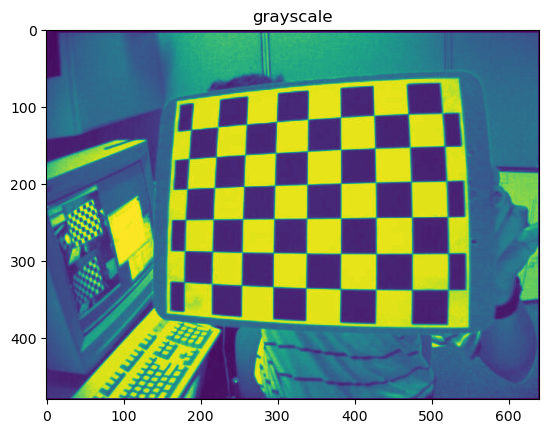

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

width = 6
height = 7
filename = 'chessboard3.jpg'

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((width*height,3), np.float32)
objp[:,:2] = np.mgrid[0:height,0:width].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Read in image
img = cv.imread(filename) 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title('grayscale')
plt.show()

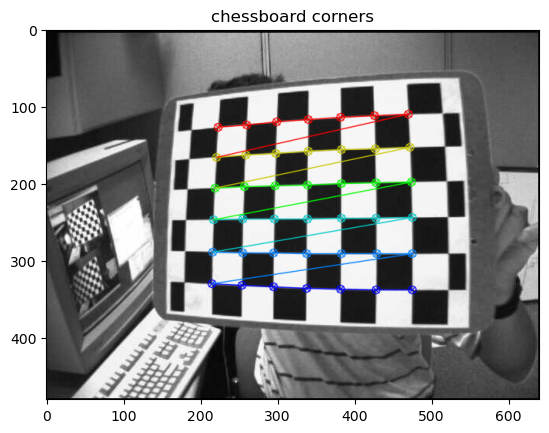

In [7]:
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (height,width), None)

# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners)
    # Draw and display the corners
    cv.drawChessboardCorners(img, (height,width), corners2, ret)
    plt.imshow(img)
    plt.title('chessboard corners')
    plt.show()
    cv.waitKey(500)

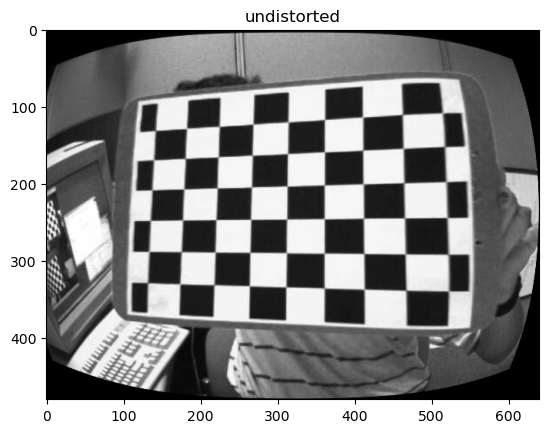

-1

In [8]:
# Find camera matrix, distortion coefficients, rotation and translation vectors
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Refine camera matrix
img = cv.imread(filename)
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
'''# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
'''

cv.imwrite('calibresult.jpg', dst)

res = cv.imread('calibresult.jpg') 
plt.imshow(res)
plt.title('undistorted')
plt.show()
cv.waitKey(500)